In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
#analysis_data_filepath = "/project/pi_cberger_smith_edu/nlsigma_data/"
analysis_data_filepath = "/project/pi_cberger_smith_edu/nlsigma_data_L180/"
source_data_filepath = "/work/pi_cberger_smith_edu/data_QL_L180/"#_systematics"#_QL_L180/"
analyzer = LatticeData(datadir = analysis_data_filepath, use_full_filepath = True)

## Copy data from source directory to analysis directory

In [3]:
analyzer.copy_data_from_directory(source_data_filepath)

run not yet complete
L_180_beta_1.600000_itheta_0.785398_ntherm_0_nMC_10000_freq_1
Status: 1890 lines written


# Systematics plots

In [4]:
df = analyzer.get_data()
sns.set_palette("magma", n_colors=len(df["length"].unique()))

In [5]:
all_params = analyzer.all_params()
#all_params

In [6]:
itheta = 0.5*np.pi
beta = 1.6
length = 10
nMC = 10000
ntherm = 0
plot_params = {"beta": beta, "nMC": nMC}#,"itheta": itheta, "length": length, "ntherm": ntherm}
df_systematics = analyzer.get_data(**plot_params)

In [7]:
df_systematics.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,32400.0,-30.0,-31924.350182,-31924.350182,-0.001801,-0.001541,0.00195,0.662809,34.0,...,95,761,761,1,4.656056,-5.172832,0.0032,-0.03035,0.096126,0.106795
1,1,32400.0,-37.0,-40823.217516,-40823.217516,0.000462,-0.001541,0.00195,0.587361,175.0,...,95,761,761,1,2.619947,2.358209,0.0032,-0.03035,0.210856,-0.189791
2,2,32400.0,-1.0,-46116.565430,-46116.565430,0.002276,-0.001541,0.00195,0.538714,184.0,...,95,761,761,1,5.815106,5.234165,0.0032,-0.03035,0.095000,-0.085509
3,3,32400.0,-17.0,-49368.175894,-49368.175894,0.002618,-0.001541,0.00195,0.505980,192.0,...,95,761,761,1,6.236721,5.613660,0.0032,-0.03035,0.088577,-0.079728
4,4,32400.0,-9.0,-51978.551482,-51978.551482,0.002563,-0.001541,0.00195,0.479858,201.0,...,95,761,761,1,6.170862,5.554380,0.0032,-0.03035,0.089523,-0.080579


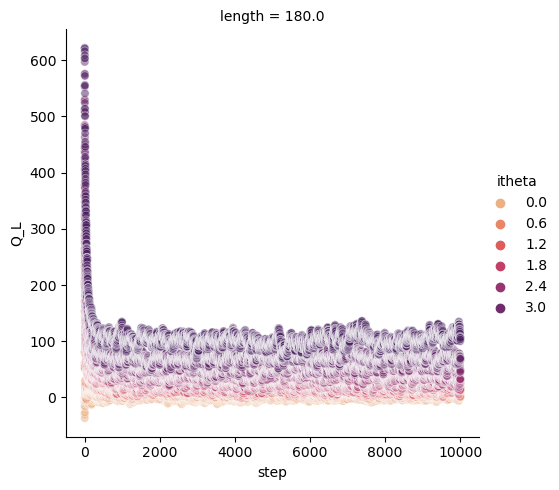

In [8]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "itheta",col = "length",
            alpha = 0.5,palette = "flare" )
plt.show()

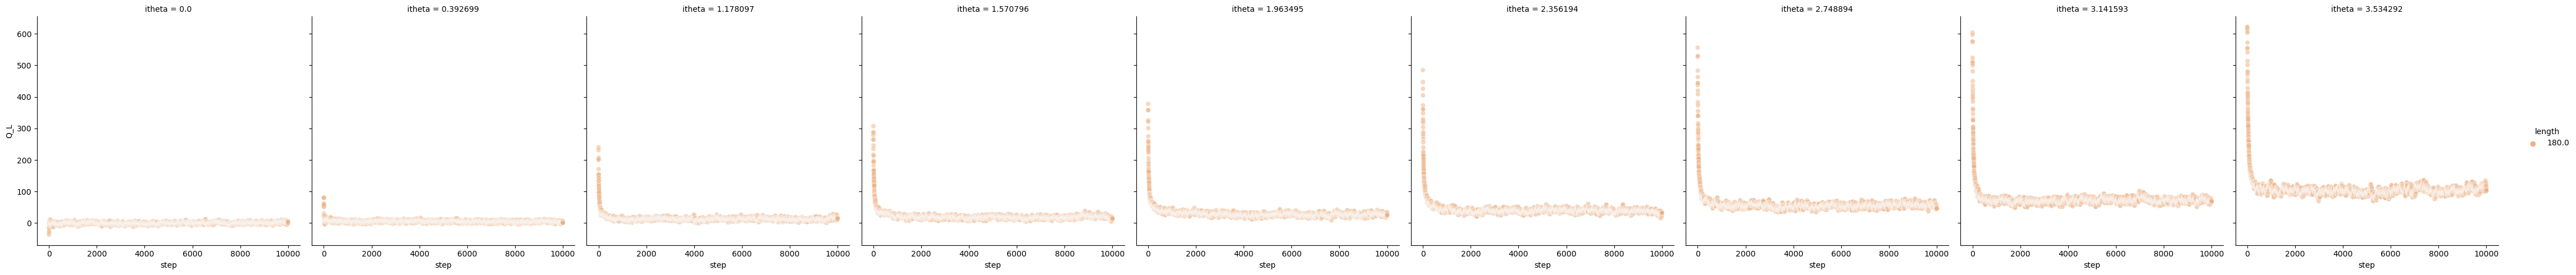

In [9]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "length",col = "itheta",
            alpha = 0.5,palette = "flare" )
plt.show()

In [10]:
itheta = 1.*np.pi
beta = 1.6
length = 180
nMC = 10000
ntherm = 0
freq = 1
acf_params = {"beta": beta, "nMC": nMC,"itheta": itheta, "length": length, "ntherm": ntherm, "freq": freq}

In [11]:
run = analyzer.get_data(single_run = True,suppress_output = False,**acf_params)

freq 1
nMC 10000
ntherm 0
itheta 3.141593
beta 1.6
length 180


In [12]:
run.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,32400.0,513.0,-30895.432839,-32507.069871,-0.001602,0.001812,0.005203,0.651049,7.0,...,515,625,624,1,6.528724,2.762594,-0.018217,0.01878,0.129909,-0.054970
1,1,32400.0,604.0,-39937.178449,-41834.700412,0.001061,0.001812,0.005203,0.578966,14.0,...,515,625,624,1,2.248244,-5.313183,-0.018217,0.01878,0.067546,0.159629
2,2,32400.0,597.0,-44966.338543,-46841.869357,-0.000067,0.001812,0.005203,0.531615,21.0,...,515,625,624,1,1.335164,0.564967,-0.018217,0.01878,0.635233,-0.268795
3,3,32400.0,574.0,-48326.978626,-50130.252809,-0.001366,0.001812,0.005203,0.498380,28.0,...,515,625,624,1,6.028683,2.551004,-0.018217,0.01878,0.140684,-0.059530
4,4,32400.0,576.0,-50744.163534,-52553.720902,-0.002892,0.001812,0.005203,0.473796,35.0,...,515,625,624,1,8.771952,3.711803,-0.018217,0.01878,0.096688,-0.040913


In [13]:
decorr = analyzer.ta(run["Q_L"])

In [14]:
run = analyzer.autocorrelation(run)

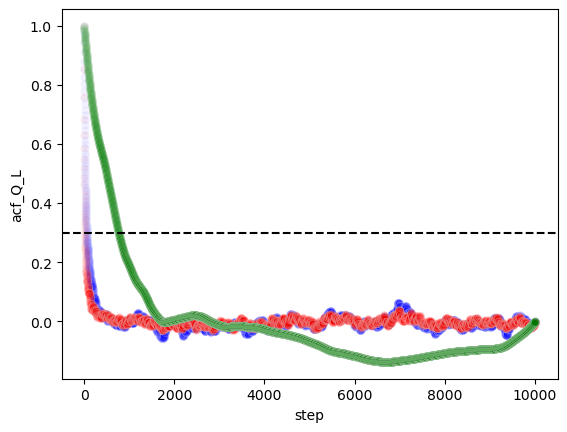

In [15]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green", alpha = 0.05)
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

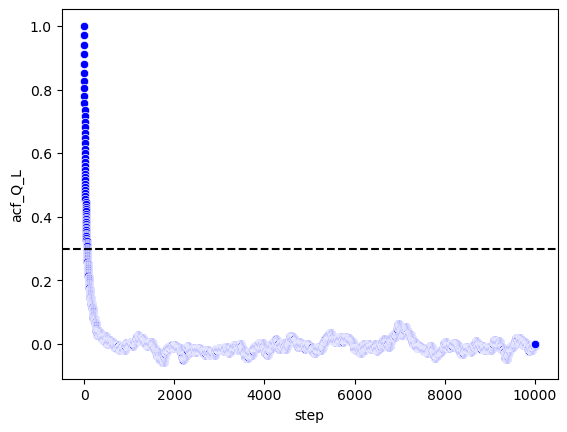

In [16]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

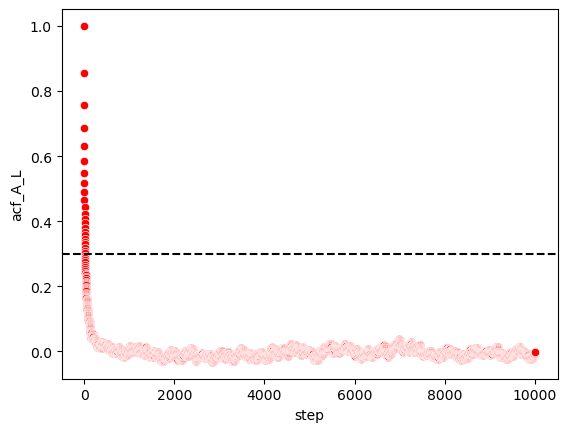

In [17]:
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

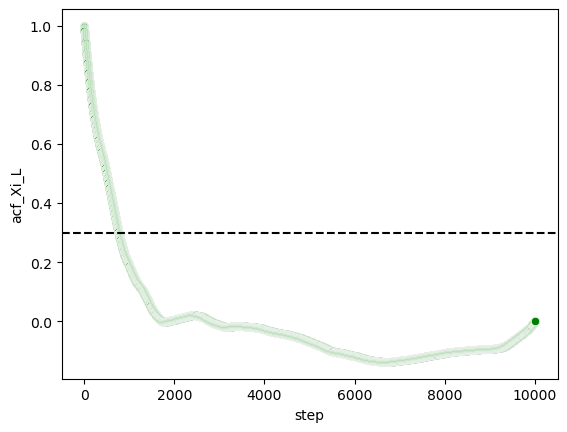

In [18]:
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

In [19]:
df_ta = analyzer.do_stats(therm = 0.0, **plot_params)
df_ta = df_ta[['Q_L_ta', 'A_L_ta', 'S_L_ta', 'Xi_L_ta']]
df_ta = df_ta.rename(columns = {'Q_L_ta':"Q_L", 'A_L_ta':"A_L", 'S_L_ta':"S_L", 'Xi_L_ta':"Xi_L"})
df_ta.columns.name = "observable"
df_ta = df_ta.stack()
df_ta.name = "ta"
df_ta = df_ta.to_frame()

In [20]:
# df_ta.head()

In [21]:
# sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "observable", col = "length", row = "nMC",
#            palette = analyzer.palette)
# plt.show()

In [22]:
# sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "length", col = "observable", row = "nMC",
#            palette = analyzer.palette)
# plt.show()

# Timing

Note, not all output files have timing info, so we will need to deal with nans.

In [23]:
df_dt = analyzer.get_data()

In [24]:
df_dt = df_dt.dropna(subset = ['dt'])

In [25]:
df_dt.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,32400.0,-30.0,-31924.350182,-31924.350182,-0.001801,-0.001541,0.00195,0.662809,34.0,...,95,761,761,1,4.656056,-5.172832,0.0032,-0.03035,0.096126,0.106795
1,1,32400.0,-37.0,-40823.217516,-40823.217516,0.000462,-0.001541,0.00195,0.587361,175.0,...,95,761,761,1,2.619947,2.358209,0.0032,-0.03035,0.210856,-0.189791
2,2,32400.0,-1.0,-46116.565430,-46116.565430,0.002276,-0.001541,0.00195,0.538714,184.0,...,95,761,761,1,5.815106,5.234165,0.0032,-0.03035,0.095000,-0.085509
3,3,32400.0,-17.0,-49368.175894,-49368.175894,0.002618,-0.001541,0.00195,0.505980,192.0,...,95,761,761,1,6.236721,5.613660,0.0032,-0.03035,0.088577,-0.079728
4,4,32400.0,-9.0,-51978.551482,-51978.551482,0.002563,-0.001541,0.00195,0.479858,201.0,...,95,761,761,1,6.170862,5.554380,0.0032,-0.03035,0.089523,-0.080579


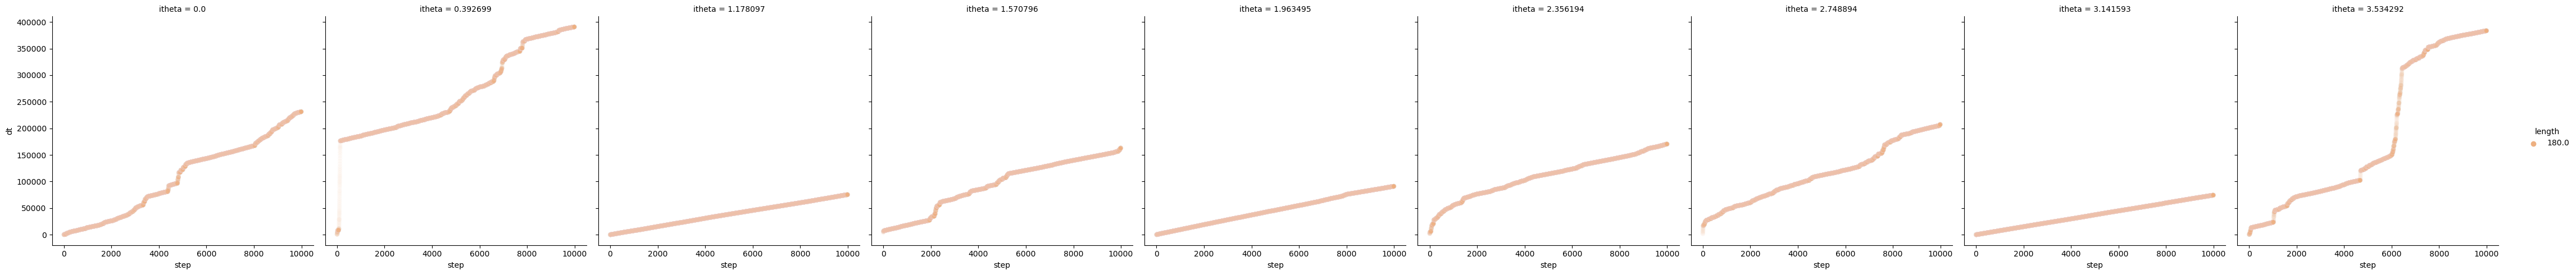

In [26]:
sns.relplot(data = df_dt, x = "step", y = "dt", hue = "length",col = "itheta",
            alpha = 0.05,palette = "flare" )
plt.show()

In [27]:
df_time = analyzer.do_stats()

In [28]:
df_time.head()

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,180.0,0.000000,1.6,10000.0,0.0,1.0,32400.0,-0.1685,-67016.696004,-67016.696004,...,0.010474,7.074178,6.383247,0.0,0.0,0.007517,0.007382,231392.0,3856.533333,64.275556
1,180.0,0.392699,1.6,10000.0,0.0,1.0,32400.0,5.1386,-67022.393061,-67024.410984,...,0.010631,4.523776,3.322352,0.0,0.0,0.069078,0.056374,390898.0,6514.966667,108.582778
2,180.0,1.178097,1.6,10000.0,0.0,1.0,32400.0,13.6395,-66950.198127,-66966.266785,...,0.010374,0.428173,3.054366,0.0,0.0,0.002307,0.016454,75404.0,1256.733333,20.945556
3,180.0,1.570796,1.6,10000.0,0.0,1.0,32400.0,20.3001,-66882.170385,-66914.057707,...,0.010463,2.450181,6.533724,0.0,0.0,0.073675,0.063499,163078.0,2717.966667,45.299444
4,180.0,1.963495,1.6,10000.0,0.0,1.0,32400.0,29.7850,-66774.747461,-66833.230171,...,0.010415,0.006082,2.727224,0.0,0.0,0.000025,0.011288,91077.0,1517.950000,25.299167


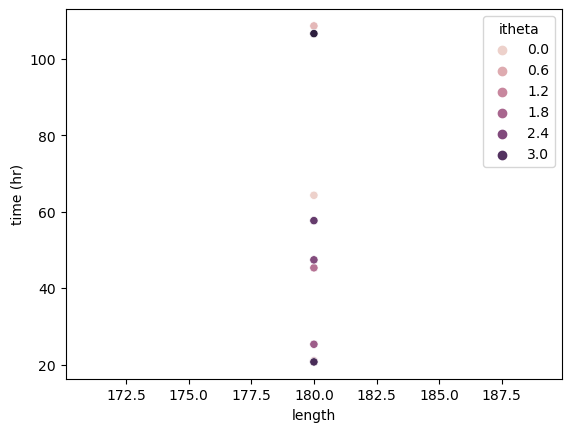

In [29]:
sns.scatterplot(data = df_time, x = "length", y = "time (hr)", hue = "itheta")
#plt.yscale('log')
plt.show()